In [4]:
import numpy as np
from osgeo import gdal, gdal_array
import pandas as pd
import operator
import gc
import os



roi_ds = gdal.Open('/content/drive/MyDrive/data/cdl2017.tiff', gdal.GA_ReadOnly)

roi = roi_ds.GetRasterBand(1).ReadAsArray()

classes = np.unique(roi)


dict = {}
for c in classes:
    dict[c] = (roi == c).sum()
sorted_x = sorted(dict.items(), key=operator.itemgetter(1))
print("Top 6 classes and pixel counts \n",sorted_x[-6:])

Top 6 classes and pixel counts 
 [(225, 617040), (121, 766044), (36, 1543068), (75, 4729104), (69, 8311968), (255, 9381144)]


In [5]:
top_classes = [69,75,36,121,225]      #top  5 classes exclude 255 class label

In [6]:
n_samples = (roi > 0).sum()
print('We have {n} samples'.format(n=n_samples))
labels = np.unique(roi[roi > 0])
print('The training data include {n} classes: {classes}'.format(n=labels.size, 
                                                                classes=labels))
y = roi[roi > 0]

We have 28406694 samples
The training data include 55 classes: [  1   2   4  21  23  24  28  33  36  37  42  48  49  54  57  59  61  66
  67  69  71  72  75  76  77 111 121 122 123 124 131 152 176 190 195 204
 205 206 208 209 212 213 216 217 218 220 224 225 226 227 236 237 238 242
 255]


In [7]:
import os
os.path.isfile('/content/drive/MyDrive/data/20170708.tiff')

True

In [8]:
os.path.isfile('/content/drive/MyDrive/data/20170807.tiff')
os.path.isfile('/content/drive/MyDrive/data/20170905.tiff')
os.path.isfile('/content/drive/MyDrive/data/20170923.tiff')
os.path.isfile('/content/drive/MyDrive/data/20171015.tiff')
os.path.isfile('/content/drive/MyDrive/data/20171207.tiff')

True

In [9]:
images = ['/content/drive/MyDrive/data/20170306.tiff','/content/drive/MyDrive/data/20170410.tiff',
           '/content/drive/MyDrive/data/20170601.tiff','/content/drive/MyDrive/data/20170615.tiff',
           '/content/drive/MyDrive/data/20170807.tiff','/content/drive/MyDrive/data/20170708.tiff',
           '/content/drive/MyDrive/data/20170905.tiff','/content/drive/MyDrive/data/20170923.tiff',
           '/content/drive/MyDrive/data/20171015.tiff','/content/drive/MyDrive/data/20171207.tiff']

In [ ]:
%cd /content/drive/MyDrive/data/

/content/drive/MyDrive/data


In [11]:
print("Reading class 69")
final = pd.DataFrame()

for c in top_classes:
# for c in sorted_x:
    
    temp = pd.DataFrame()
    
    print(c)
    
    for img in images:

        print(img)

        train_ds = gdal.Open(img, gdal.GA_ReadOnly)

        print(train_ds.RasterXSize,train_ds.RasterYSize)

        img_b1 = np.zeros((train_ds.RasterYSize, train_ds.RasterXSize, train_ds.RasterCount),
                       gdal_array.GDALTypeCodeToNumericTypeCode(train_ds.GetRasterBand(1).DataType))
        
        for b in range(img_b1.shape[2]):
            img_b1[:, :, b] = train_ds.GetRasterBand(b + 1).ReadAsArray()
        
        print(img_b1.shape)


        Xt = img_b1[roi==c, :] 
        
        Xt1 = pd.DataFrame(Xt)
        
        Xt2 = Xt1.sample(n=100000)
        
        Xt2.reset_index(drop=True,inplace=True)
        
        temp = pd.concat([Xt2,temp],axis=1)
        
        temp["class"] = c
      
    final = pd.concat([temp,final],axis=0)
    final.reset_index(drop=True,inplace=True)
    
    gc.collect()

Reading class 69
69
/content/drive/MyDrive/data/20170306.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170410.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170601.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170615.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170807.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170708.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170905.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170923.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20171015.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20171207.tiff
5718 4969
(4969, 5718, 5)
75
/content/drive/MyDrive/data/20170306.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170410.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170601.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/data/20170615.tiff
5718 4969
(4969, 5718, 5)
/content/drive/MyDrive/da

In [17]:
final

col_0   col_1   col_2   col_3  ...  col_47  col_48   col_49  col_50
0       4910.0  4560.0  4761.0  4223.0  ...  1779.0  3494.0  11179.0     225
1       4152.0  3540.0  3552.0  3403.0  ...  2753.0  4277.0   9543.0     225
2       3766.0  3201.0  2520.0  2307.0  ...  1789.0  4505.0  12504.0     225
3       4122.0  3667.0  2969.0  3354.0  ...  1782.0  4134.0  13535.0     225
4       4011.0  3474.0  2730.0  3564.0  ...  2019.0  3702.0  10680.0     225
...        ...     ...     ...     ...  ...     ...     ...      ...     ...
499995  4946.0  4470.0  4315.0  3783.0  ...  4232.0  4858.0   6008.0      69
499996  4417.0  4080.0  4220.0  3773.0  ...  4679.0  5318.0   6626.0      69
499997  3255.0  2685.0  2121.0  2278.0  ...  6669.0  6233.0   6100.0      69
499998  3857.0  3130.0  2853.0  2440.0  ...  5731.0  5813.0   6384.0      69
499999  4381.0  3867.0  3858.0  3752.0  ...  4571.0  5179.0   6147.0      69

[500000 rows x 51 columns]

In [18]:
final.columns = ['col_'+str(i) for i in range(51)]

In [14]:
final.head()

col_0   col_1   col_2   col_3  ...  col_47  col_48   col_49  col_50
0  4910.0  4560.0  4761.0  4223.0  ...  1779.0  3494.0  11179.0     225
1  4152.0  3540.0  3552.0  3403.0  ...  2753.0  4277.0   9543.0     225
2  3766.0  3201.0  2520.0  2307.0  ...  1789.0  4505.0  12504.0     225
3  4122.0  3667.0  2969.0  3354.0  ...  1782.0  4134.0  13535.0     225
4  4011.0  3474.0  2730.0  3564.0  ...  2019.0  3702.0  10680.0     225

[5 rows x 51 columns]

In [15]:
final.to_csv("/content/drive/MyDrive/data/final.csv",index=False)

In [16]:
from __future__ import print_function, division

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Activation

from tensorflow.keras.optimizers import SGD

from keras import regularizers
from keras import initializers

import pandas as pd
from osgeo import gdal, gdal_array
import numpy as np

import os
from os import path

gdal.UseExceptions()
gdal.AllRegister()

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [100, 100]

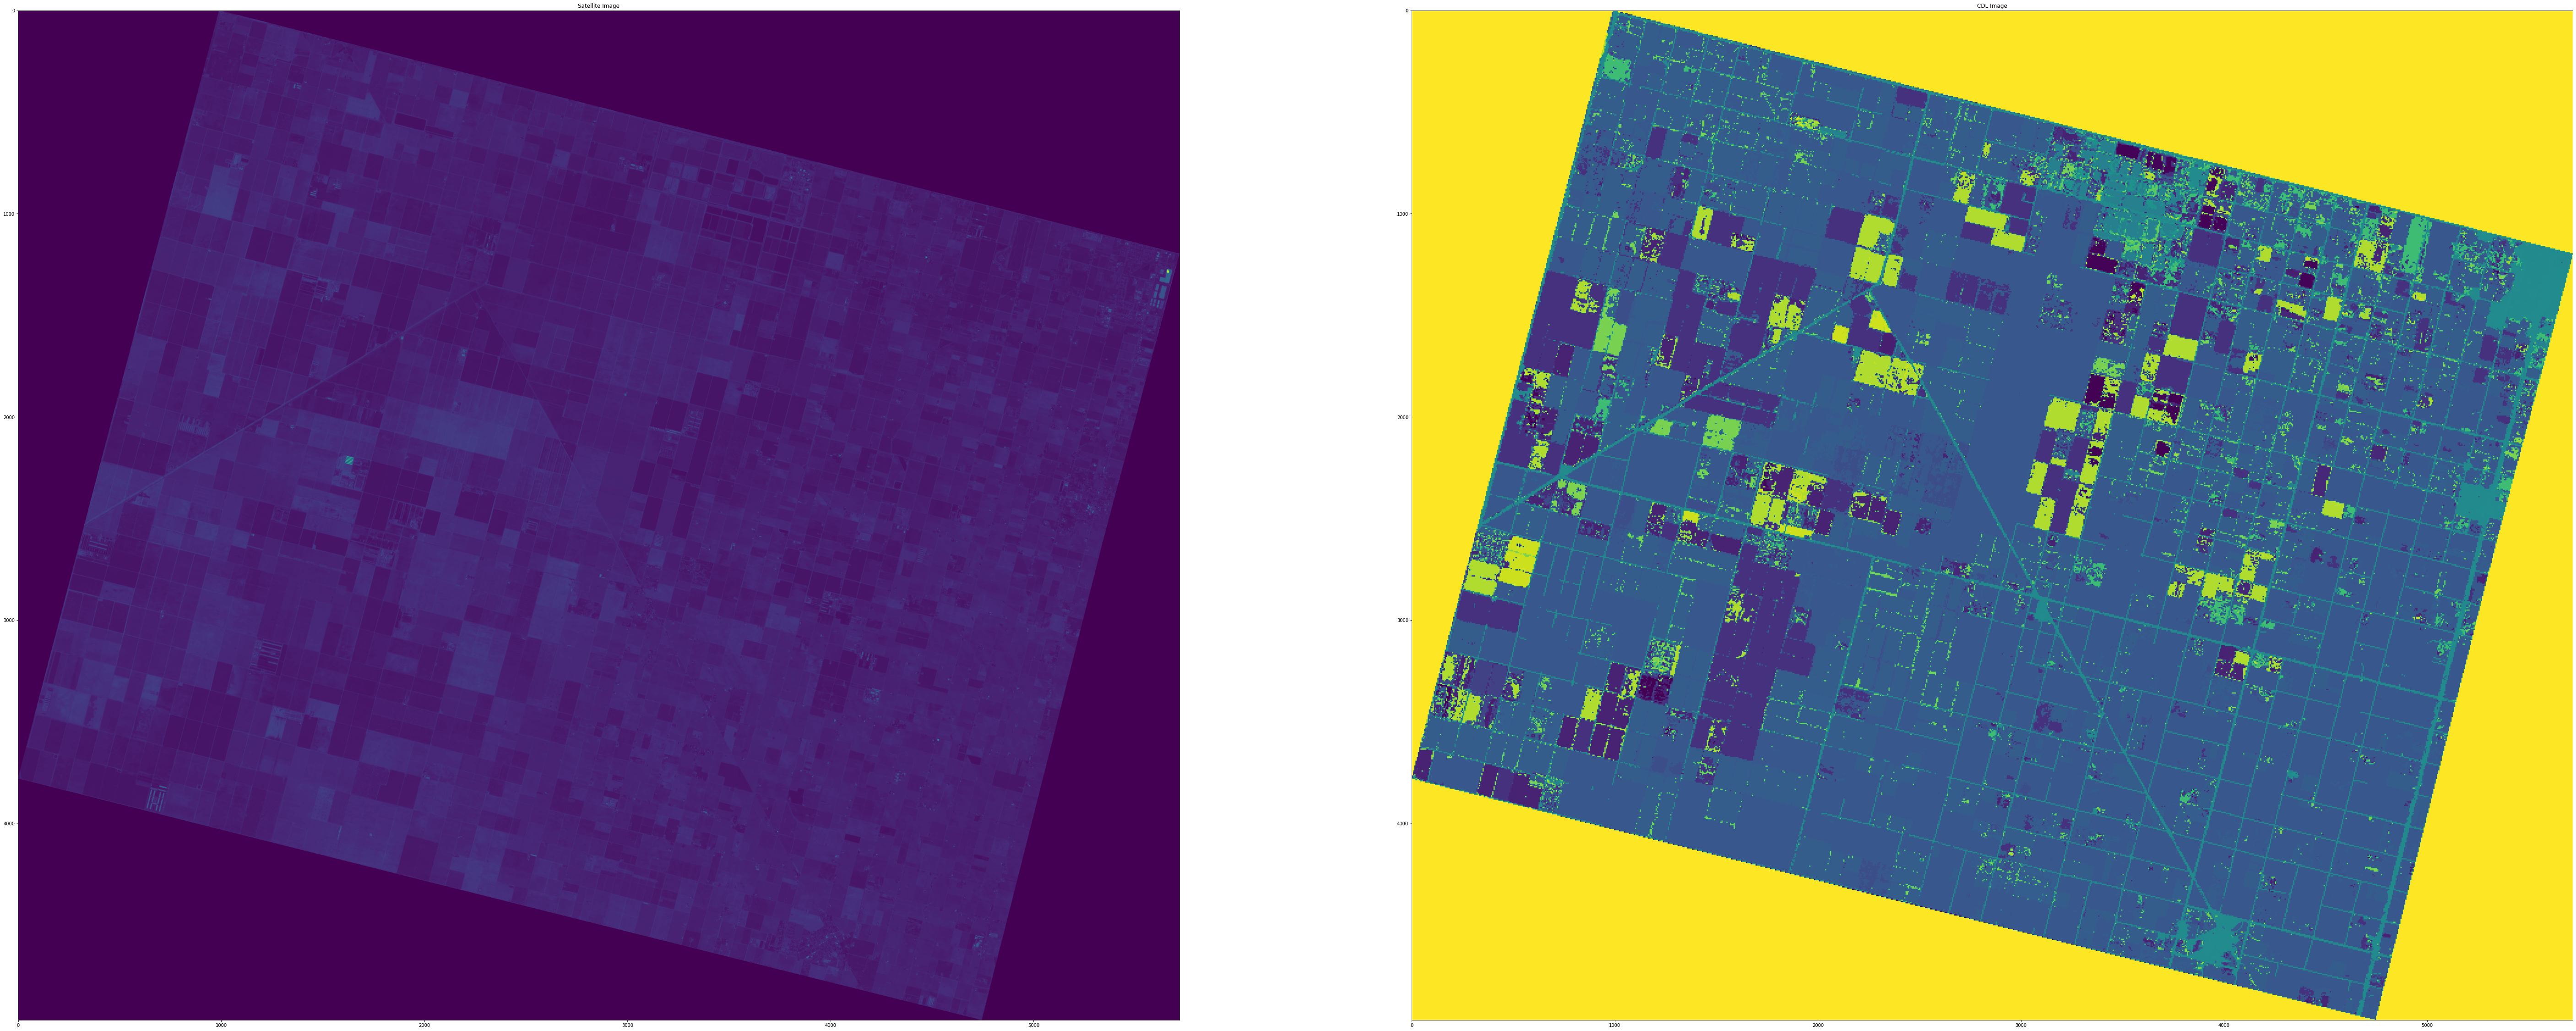

In [20]:
img_ds = gdal.Open('/content/drive/MyDrive/data/20170306.tiff', gdal.GA_ReadOnly)
roi_ds = gdal.Open('/content/drive/MyDrive/data/cdl2017.tiff', gdal.GA_ReadOnly)

img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()

roi = roi_ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)

plt.subplot(121)
plt.imshow(img[:, :, 1])
plt.title('Satellite Image')

plt.subplot(122)
plt.imshow(roi)
plt.title('CDL Image')

plt.show()
    

In [21]:
img.shape,roi.shape

((4969, 5718, 5), (4969, 5718))

In [22]:
classes = np.unique(roi)
for c in classes:
    print('Class {c} contains {n} pixels'.format(c=c,
                                                 n=(roi == c).sum()))

Class 0 contains 6048 pixels
Class 1 contains 51120 pixels
Class 2 contains 70704 pixels
Class 4 contains 3492 pixels
Class 21 contains 47700 pixels
Class 23 contains 864 pixels
Class 24 contains 494748 pixels
Class 28 contains 73512 pixels
Class 33 contains 6120 pixels
Class 36 contains 1543068 pixels
Class 37 contains 23724 pixels
Class 42 contains 936 pixels
Class 48 contains 612 pixels
Class 49 contains 37476 pixels
Class 54 contains 15696 pixels
Class 57 contains 144 pixels
Class 59 contains 2124 pixels
Class 61 contains 379464 pixels
Class 66 contains 13464 pixels
Class 67 contains 8208 pixels
Class 69 contains 8311968 pixels
Class 71 contains 4644 pixels
Class 72 contains 144 pixels
Class 75 contains 4729104 pixels
Class 76 contains 340560 pixels
Class 77 contains 1620 pixels
Class 111 contains 148788 pixels
Class 121 contains 766044 pixels
Class 122 contains 331164 pixels
Class 123 contains 138420 pixels
Class 124 contains 31998 pixels
Class 131 contains 37512 pixels
Class 152 

In [23]:
top_classes = [69,75,36,121,225]

In [24]:
n_samples = (roi > 0).sum()
print('We have {n} samples'.format(n=n_samples))

labels = np.unique(roi[roi > 0])
print('The training data include {n} classes: {classes}'.format(n=labels.size, 
                                                                classes=labels))
y = roi[roi > 0]

print('Our y array is sized: {sz}'.format(sz=y.shape))

print('After masking, our y array is sized: {sz}'.format(sz=y.shape))

We have 28406694 samples
The training data include 55 classes: [  1   2   4  21  23  24  28  33  36  37  42  48  49  54  57  59  61  66
  67  69  71  72  75  76  77 111 121 122 123 124 131 152 176 190 195 204
 205 206 208 209 212 213 216 217 218 220 224 225 226 227 236 237 238 242
 255]
Our y array is sized: (28406694,)
After masking, our y array is sized: (28406694,)


In [25]:
final = pd.read_csv("/content/drive/MyDrive/data/final.csv")

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final.iloc[:,:-1],final.iloc[:,-1], test_size=0.33, random_state=42)

In [27]:
X_train.shape,y_train.shape

((335000, 50), (335000,))

In [28]:
X_test.shape,y_test.shape

((165000, 50), (165000,))

In [29]:
final.columns = ['col_'+str(i) for i in range(51)]  

In [30]:
final.head()

col_0   col_1   col_2   col_3  ...  col_47  col_48   col_49  col_50
0  4910.0  4560.0  4761.0  4223.0  ...  1779.0  3494.0  11179.0     225
1  4152.0  3540.0  3552.0  3403.0  ...  2753.0  4277.0   9543.0     225
2  3766.0  3201.0  2520.0  2307.0  ...  1789.0  4505.0  12504.0     225
3  4122.0  3667.0  2969.0  3354.0  ...  1782.0  4134.0  13535.0     225
4  4011.0  3474.0  2730.0  3564.0  ...  2019.0  3702.0  10680.0     225

[5 rows x 51 columns]

In [31]:
a = final.iloc[:,:50]  
b = final['col_50']    
y_final = final['col_50']  
C = pd.concat([a,b],axis=1) 

In [ ]:
# NDVI

In [32]:
C.shape,a.shape,b.shape

((500000, 51), (500000, 50), (500000,))

In [33]:
C.head()

col_0   col_1   col_2   col_3  ...  col_47  col_48   col_49  col_50
0  4910.0  4560.0  4761.0  4223.0  ...  1779.0  3494.0  11179.0     225
1  4152.0  3540.0  3552.0  3403.0  ...  2753.0  4277.0   9543.0     225
2  3766.0  3201.0  2520.0  2307.0  ...  1789.0  4505.0  12504.0     225
3  4122.0  3667.0  2969.0  3354.0  ...  1782.0  4134.0  13535.0     225
4  4011.0  3474.0  2730.0  3564.0  ...  2019.0  3702.0  10680.0     225

[5 rows x 51 columns]

In [34]:
mul = [i*5 for i in list(range(11))]    # 0 - 10 of list

In [35]:
mul

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [36]:
ndvi_df = pd.DataFrame(pd.Series(C.iloc[:,-1]))   # create dataframe of series
i= 0
for m in mul[:-1]:
    print("printing for t_",i)
    print(a.iloc[:,0+m:5+m].head(5))
    temp = a.iloc[:,0+m:5+m]
    ndvi = (temp.loc[:,temp.columns[0]] - temp.loc[:,temp.columns[4]]) / (temp.loc[:,temp.columns[4]] + temp.loc[:,temp.columns[0]])
    Xt1 = pd.DataFrame(ndvi)
    Xt1.columns = ["t_"+str(i)]
    ndvi_df = pd.concat([Xt1,ndvi_df],axis=1)
    print(ndvi_df.shape)
    print("------------------------------")
    i+=1

printing for t_ 0
    col_0   col_1   col_2   col_3   col_4
0  4910.0  4560.0  4761.0  4223.0  4313.0
1  4152.0  3540.0  3552.0  3403.0  3684.0
2  3766.0  3201.0  2520.0  2307.0  2224.0
3  4122.0  3667.0  2969.0  3354.0  4175.0
4  4011.0  3474.0  2730.0  3564.0  5020.0
(500000, 2)
------------------------------
printing for t_ 1
    col_5   col_6   col_7   col_8   col_9
0  5811.0  5023.0  4841.0  4695.0  5183.0
1  5788.0  4904.0  4745.0  4436.0  4490.0
2  7863.0  7803.0  7619.0  7098.0  6692.0
3  7018.0  6836.0  6946.0  6284.0  6086.0
4  6841.0  6407.0  6539.0  6151.0  6153.0
(500000, 3)
------------------------------
printing for t_ 2
   col_10  col_11  col_12  col_13  col_14
0  7602.0  7512.0  7458.0  6610.0  6568.0
1  8327.0  8535.0  8628.0  8093.0  8216.0
2  7223.0  7149.0  6694.0  6870.0  7749.0
3  4579.0  4402.0  2183.0  3418.0  3284.0
4  7711.0  7905.0  8069.0  7144.0  7394.0
(500000, 4)
------------------------------
printing for t_ 3
   col_15  col_16  col_17  col_18  col_19
0

In [37]:
ndvi_df.head()

t_9       t_8       t_7       t_6  ...       t_2       t_1       t_0  col_50
0 -0.439387 -0.163799  0.059497  0.042966  ...  0.072971  0.057122  0.064729     225
1 -0.337023 -0.375007  0.012706 -0.401438  ...  0.006710  0.126289  0.059724     225
2 -0.471751 -0.311769 -0.002082 -0.489553  ... -0.035132  0.080453  0.257429     225
3 -0.514321 -0.296893  0.019951  0.054120  ...  0.164695  0.071123 -0.006388     225
4 -0.411392 -0.102835  0.101602 -0.124525  ...  0.020986  0.052948 -0.111726     225

[5 rows x 11 columns]

In [38]:
ndvi_df.shape

(500000, 11)

In [39]:
ndvi_df.columns

Index(['t_9', 't_8', 't_7', 't_6', 't_5', 't_4', 't_3', 't_2', 't_1', 't_0',
       'col_50'],
      dtype='object')

In [40]:
c1 = pd.DataFrame(np.mean(ndvi_df.loc[ndvi_df['col_50']==69,['t_9', 't_8', 't_7', 't_6', 't_5', 't_4', 't_3', 't_2', 't_1', 't_0']],axis=0))
c2 = pd.DataFrame(np.mean(ndvi_df.loc[ndvi_df['col_50']==75,['t_9', 't_8', 't_7', 't_6', 't_5', 't_4', 't_3', 't_2', 't_1', 't_0']],axis=0))
c3 = pd.DataFrame(np.mean(ndvi_df.loc[ndvi_df['col_50']==121,['t_9', 't_8', 't_7', 't_6', 't_5', 't_4', 't_3', 't_2', 't_1', 't_0']],axis=0))
c4 = pd.DataFrame(np.mean(ndvi_df.loc[ndvi_df['col_50']==225,['t_9', 't_8', 't_7', 't_6', 't_5', 't_4', 't_3', 't_2', 't_1', 't_0']],axis=0))

t_9       t_8       t_7  ...       t_0  col_50   avg_ndvi
0  -0.439387 -0.163799  0.059497  ...  0.064729     225  20.398440
1  -0.337023 -0.375007  0.012706  ...  0.059724     225  20.348435
2  -0.471751 -0.311769 -0.002082  ...  0.257429     225  20.313522
3  -0.514321 -0.296893  0.019951  ... -0.006388     225  20.328329
4  -0.411392 -0.102835  0.101602  ... -0.111726     225  20.366673
5   0.000161 -0.305418  0.056658  ...  0.032733     225  20.395108
6  -0.504437  0.034396  0.035021  ...  0.029929     225  20.368435
7  -0.482499  0.036624  0.077888  ...  0.206819     225  20.396891
8  -0.262807  0.072674  0.073310  ...  0.009852     225  20.380833
9  -0.485186 -0.304032  0.047624  ...  0.027259     225  20.322062
10 -0.538989 -0.356105  0.051449  ... -0.222279     225  20.303646
11 -0.487130 -0.366435  0.060455  ... -0.008226     225  20.348364
12 -0.219434 -0.368294  0.036831  ...  0.142896     225  20.411390
13 -0.521346  0.107006  0.073549  ...  0.106338     225  20.418463
14 -0.266246 -0.266539 -0.010004  ...  0.125857     225  20.384431
15 -0.490998 -0.420178  0.073451  ...  0.062424     225  20.321059
16 -0.495674 -0.310361  0.014774  ...  0.149695     225  20.272976
17 -0.513484 -0.370278  0.023745  ...  0.049459     225  20.268184
18 -0.502725 -0.330740  0.040161  ...  0.092727     225  20.310736
19 -0.360511  0.098759 -0.007727  ...  0.032844     225  20.413609

[20 rows x 12 columns]

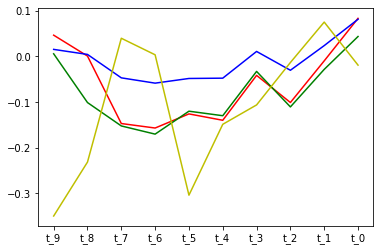

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c1.index,c1.iloc[:,0],color='r', label = "gram")
plt.plot(c2.index,c2.iloc[:,0],color='g', label = "barley")
plt.plot(c3.index,c3.iloc[:,0],color='b', label = "wheat")
plt.plot(c4.index,c4.iloc[:,0],color='y', label = "potato")

ndvi_df['avg_ndvi'] = np.mean(ndvi_df,axis=1)

pd.pivot_table(ndvi_df,index=["col_50"],values = ['avg_ndvi'] ,aggfunc=np.mean)

ndvi_df.head(20)

In [42]:
df = pd.read_csv("/content/drive/MyDrive/data/final.csv")

In [43]:
df.head()

col_0   col_1   col_2   col_3  ...  col_47  col_48   col_49  col_50
0  4910.0  4560.0  4761.0  4223.0  ...  1779.0  3494.0  11179.0     225
1  4152.0  3540.0  3552.0  3403.0  ...  2753.0  4277.0   9543.0     225
2  3766.0  3201.0  2520.0  2307.0  ...  1789.0  4505.0  12504.0     225
3  4122.0  3667.0  2969.0  3354.0  ...  1782.0  4134.0  13535.0     225
4  4011.0  3474.0  2730.0  3564.0  ...  2019.0  3702.0  10680.0     225

[5 rows x 51 columns]

In [44]:
labels = df.iloc[:,-1]

In [45]:
data = df.drop(df.columns[50],axis=1)

In [46]:
data.shape

(500000, 50)

In [47]:
from keras import utils as to_categorical
from tensorflow.keras.utils import to_categorical

In [48]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
dummy_y = to_categorical(encoded_Y,num_classes=5) 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data, dummy_y, test_size=0.05, random_state=42,shuffle = True)

In [50]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [51]:
import numpy
seed = 7
numpy.random.seed(seed)

# sequential deep learning model

model = Sequential()

model.add(Dense(200, input_shape=(50, ), activation='relu',kernel_regularizer=regularizers.l2(1e-5),kernel_initializer=keras.initializers.glorot_normal(seed=seed),bias_initializer='zeros'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               10200     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1005      
                                                                 
Total params: 11,205
Trainable params: 11,205
Non-trainable params: 0
_________________________________________________________________


In [52]:
import tensorflow as tf 
sgd = tf.optimizers.Adadelta()
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [53]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=100,
         shuffle=True)
score = model.evaluate(X_test, y_test, batch_size=100)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Epoch 1/10
4750/4750 [==============================] - 20s 4ms/step - loss: 1.5952 - acc: 0.3194
Epoch 2/10
4750/4750 [==============================] - 12s 3ms/step - loss: 1.2839 - acc: 0.4797
Epoch 3/10
4750/4750 [==============================] - 12s 3ms/step - loss: 1.0943 - acc: 0.5758
Epoch 4/10
4750/4750 [==============================] - 12s 3ms/step - loss: 0.9741 - acc: 0.6313
Epoch 5/10
4750/4750 [==============================] - 12s 3ms/step - loss: 0.8894 - acc: 0.6688
Epoch 6/10
4750/4750 [==============================] - 12s 3ms/step - loss: 0.8265 - acc: 0.6959
Epoch 7/10
4750/4750 [==============================] - 12s 3ms/step - loss: 0.7788 - acc: 0.7158
Epoch 8/10
4750/4750 [==============================] - 12s 3ms/step - loss: 0.7407 - acc: 0.7309
Epoch 9/10
4750/4750 [==============================] - 12s 3ms/step - loss: 0.7097 - acc: 0.7435
Epoch 10/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5815 - acc: 0.8122

acc: 81.22%


In [55]:
n_classes = 5

model = Sequential()
model.add(Conv1D(kernel_size = 5, strides=1,filters = 32, activation='relu',input_shape=(50,1)))
                    
print(model.input_shape)
print(model.output_shape)

model.add(MaxPooling1D(pool_size = (2), strides=(2)))
print(model.output_shape)

model.add(Conv1D (kernel_size = 5, strides=1, filters = 64, activation='relu'))
print(model.output_shape)

model.add(MaxPooling1D(pool_size = (2), strides=(2)))
print(model.output_shape)

model.add(Flatten())

print(model.output_shape)

model.add(Dense (1000, activation='relu'))
print(model.output_shape)

model.add(Dense(n_classes, activation = 'softmax'))#,activity_regularizer=keras.regularizers.l2()))
print(model.output_shape)

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.001),metrics=['accuracy'])

(None, 50, 1)
(None, 46, 32)
(None, 23, 32)
(None, 19, 64)
(None, 9, 64)
(None, 576)
(None, 1000)
(None, 5)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [54]:
X1 = np.expand_dims(X_train, axis=2)

In [56]:
X1.shape,y_train.shape

((475000, 50, 1), (475000, 5))

In [59]:
model.fit(X1, y_train, epochs=10, batch_size=100)

Epoch 1/10
4750/4750 [==============================] - 100s 21ms/step - loss: 0.1984 - accuracy: 0.9272
Epoch 2/10
4750/4750 [==============================] - 99s 21ms/step - loss: 0.1513 - accuracy: 0.9444
Epoch 3/10
4750/4750 [==============================] - 100s 21ms/step - loss: 0.1382 - accuracy: 0.9492
Epoch 4/10
4750/4750 [==============================] - 100s 21ms/step - loss: 0.1293 - accuracy: 0.9525
Epoch 5/10
4750/4750 [==============================] - 105s 22ms/step - loss: 0.1216 - accuracy: 0.9550
Epoch 6/10
4750/4750 [==============================] - 100s 21ms/step - loss: 0.1149 - accuracy: 0.9574
Epoch 7/10
4750/4750 [==============================] - 99s 21ms/step - loss: 0.1074 - accuracy: 0.9599
Epoch 8/10
4750/4750 [==============================] - 99s 21ms/step - loss: 0.1000 - accuracy: 0.9627
Epoch 9/10
4750/4750 [==============================] - 100s 21ms/step - loss: 0.0916 - accuracy: 0.9656
Epoch 10/10
4750/4750 [==============================] - 1

In [60]:
X2 = np.expand_dims(X_test, axis=2)

In [61]:
scores = model.evaluate(X2, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

782/782 [==============================] - 4s 5ms/step - loss: 0.1547 - accuracy: 0.9502

accuracy: 95.02%
